In [1]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

c:\Users\Ivana\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('Emotion_classify_Data.csv')
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [3]:
print(df.Emotion.value_counts())
print(df.Emotion.isnull().value_counts())
print(df.Comment.isnull().value_counts())

anger    2000
joy      2000
fear     1937
Name: Emotion, dtype: int64
False    5937
Name: Emotion, dtype: int64
False    5937
Name: Comment, dtype: int64


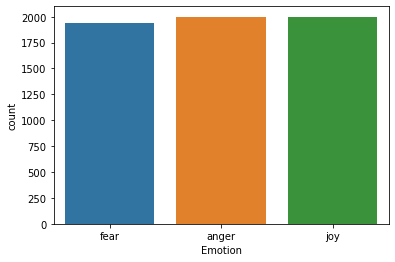

In [4]:
sns.countplot(x=df.Emotion)
plt.show()

In [31]:
nlp = spacy.load("en_core_web_sm")
def text_cleaning(text):

    doc = nlp(text)

    cleaned_tokens = [token.text.lower() for token in doc if not token.is_punct and not token.is_stop]
    return " ".join(cleaned_tokens)

c:\Users\Ivana\anaconda3\lib\site-packages\spacy\util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.6.0) was trained with spaCy v3.6.0 and may not be 100% compatible with the current version (3.7.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [32]:
text_cleaning(df.Comment[0])

'seriously hate subject death feel reluctant drop'

In [7]:
df['emotion_index'] = df['Emotion'].map({'anger':0, 'fear':1, 'joy':2})
df.head()

,Comment,Emotion,emotion_index
0,i seriously hate one subject to death but now ...,fear,1
1,im so full of life i feel appalled,anger,0
2,i sit here to write i start to dig out my feel...,fear,1
3,ive been really angry with r and i feel like a...,joy,2
4,i feel suspicious if there is no one outside l...,fear,1


In [33]:
df['clean_comment'] = df['Comment'].apply(text_cleaning)

In [34]:
df.head()

,Comment,Emotion,emotion_index,clean_comment
0,i seriously hate one subject to death but now ...,fear,1,seriously hate subject death feel reluctant drop
1,im so full of life i feel appalled,anger,0,m life feel appalled
2,i sit here to write i start to dig out my feel...,fear,1,sit write start dig feelings think afraid acce...
3,ive been really angry with r and i feel like a...,joy,2,ve angry r feel like idiot trusting place
4,i feel suspicious if there is no one outside l...,fear,1,feel suspicious outside like rapture happened


In [35]:
X = df.clean_comment
y= df.emotion_index

In [36]:
from sklearn.model_selection  import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix

# Naive Bayes Classifier

In [37]:
clf = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('naive bayes', MultinomialNB())
])

In [38]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('naive bayes', MultinomialNB())])

In [39]:
y_pred = clf.predict(X_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       410
           1       0.90      0.93      0.91       380
           2       0.94      0.90      0.92       398

    accuracy                           0.91      1188
   macro avg       0.92      0.92      0.91      1188
weighted avg       0.92      0.91      0.92      1188



Text(33.0, 0.5, 'Truth')

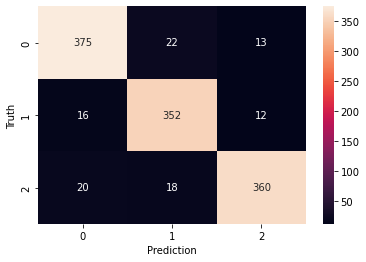

In [51]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (6,4))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Random Forest Classifier

In [43]:
clf2 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('random forest', RandomForestClassifier())
])

clf2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('random forest', RandomForestClassifier())])

In [44]:
y_pred2 = clf2.predict(X_test)

In [45]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       410
           1       0.93      0.95      0.94       380
           2       0.95      0.95      0.95       398

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



Text(33.0, 0.5, 'Truth')

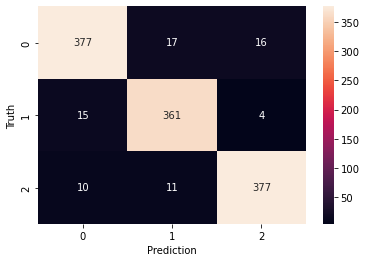

In [46]:
cm = confusion_matrix(y_test, y_pred2)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Logistic Regression

In [47]:
clf3 = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('log regression', LogisticRegression())
])

clf3.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('log regression', LogisticRegression())])

In [48]:
y_pred3 = clf3.predict(X_test)

In [49]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.92      0.93       410
           1       0.94      0.93      0.94       380
           2       0.93      0.96      0.94       398

    accuracy                           0.94      1188
   macro avg       0.94      0.94      0.94      1188
weighted avg       0.94      0.94      0.94      1188



[[376  18  16]
 [ 11 354  15]
 [ 10   5 383]]


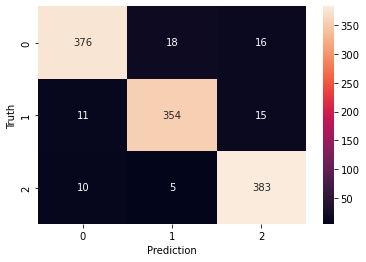

In [50]:
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

print(cm)

In [57]:
def sentiment_classifier(input_text):

    prediction = clf.predict([input_text])

    if prediction == 0:
        sentiment = "This sentiment is anger"
    elif prediction == 1:
        sentiment = "This sentiment is fear"
    elif prediction == 2:
        sentiment = "This sentiment is joy"
    else:
        sentiment = "Unknown emotion"

    return sentiment


In [58]:
sentiment_classifier("i am really happy")

'This sentiment is joy'